# PCA

### Task 1: Exploratory Data Analysis (EDA):a.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### 1.	Load the dataset and perform basic data exploration.

In [2]:
# Loading the dataset and defining it as wine
wine = pd.read_csv("wine.csv")

# Displaying the data
wine

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
# Checking the number of observations and variables
wine.shape

(178, 14)

In [4]:
# Checking the data types of each variables
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
# Dropping the Type variable unnessary variable
wine = wine.drop(["Type"], axis = 1)

# Displaying the wine data after dropping the variable
wine

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

#### 2. Examine the distribution of features using histograms, box plots, or density plots

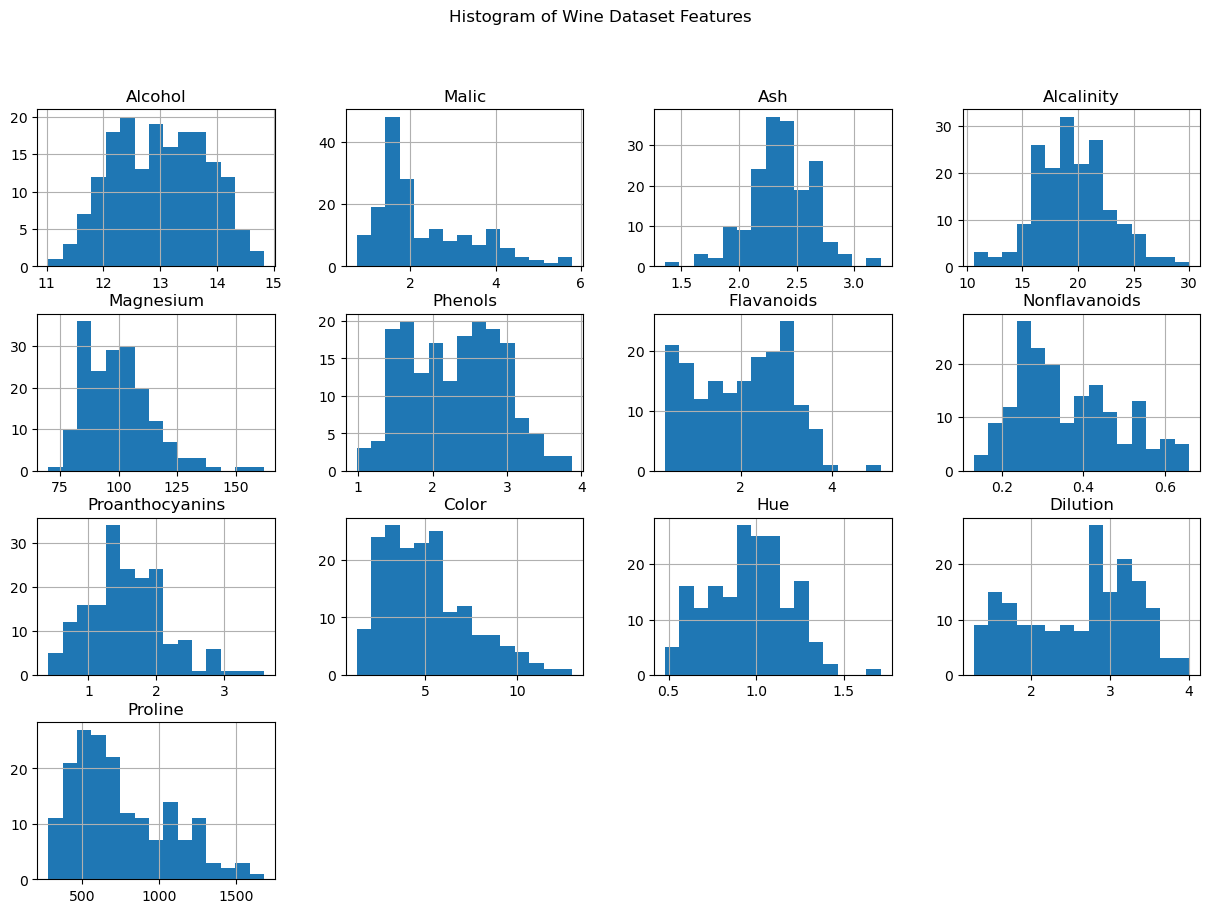

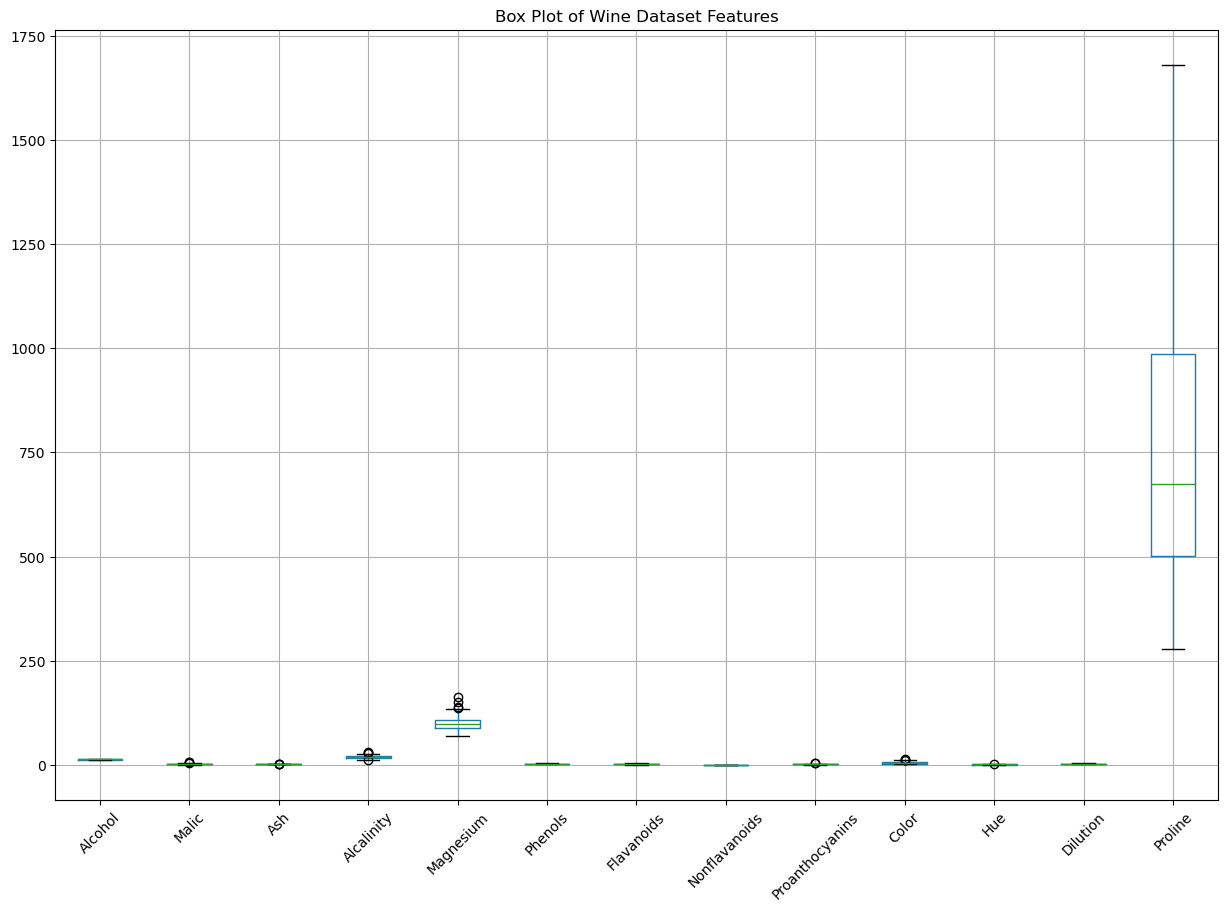

C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [8]:
# Plot histograms for each feature in the wine dataset

# - 'bins=15' specifies the number of bins for the histogram
# - 'figsize=(15, 10)' sets the size of the figure to make the histograms more readable
wine.hist(bins=15, figsize=(15, 10))

# - 'plt.suptitle' adds a title to the entire figure
plt.suptitle('Histogram of Wine Dataset Features')

# - 'plt.show()' displays the plots

plt.show()

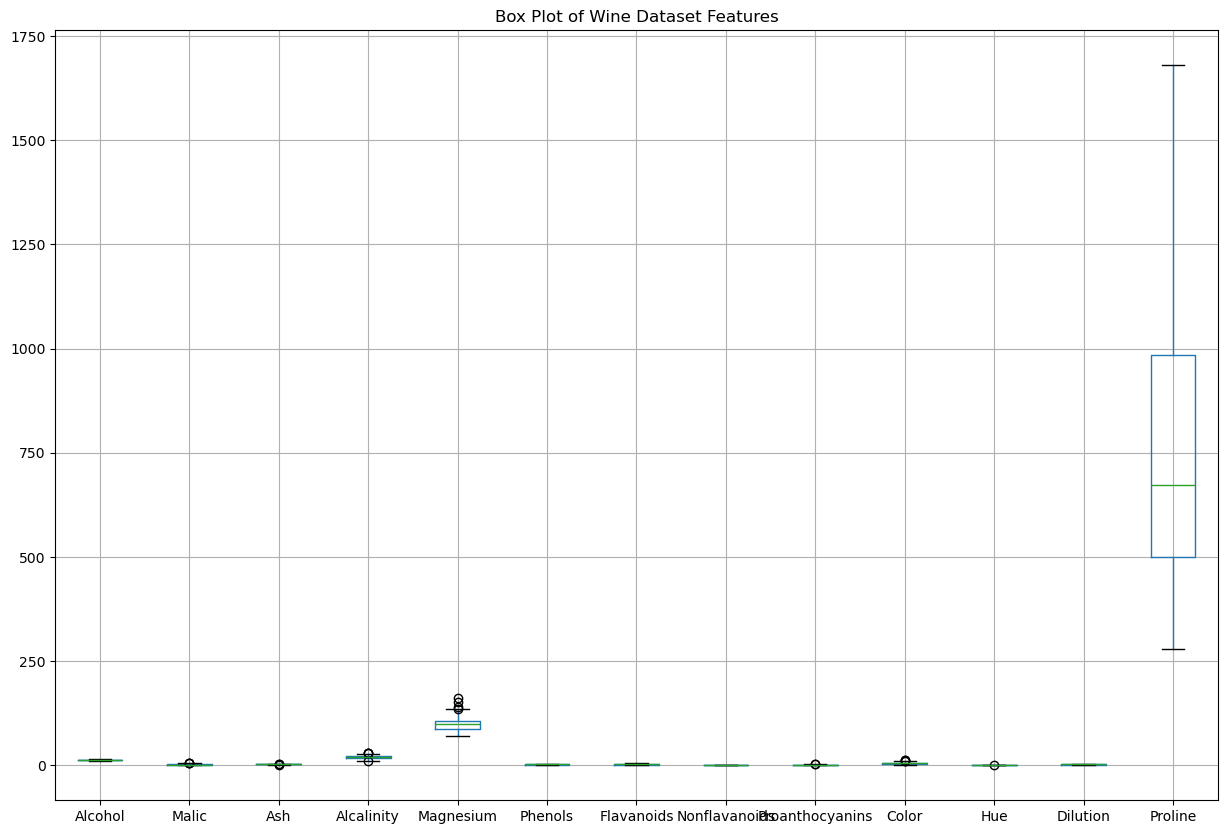

In [11]:
# Create a box plot for each feature in the wine dataset

# - 'figsize=(15, 10)' sets the size of the figure to ensure the box plots are clearly visible
plt.figure(figsize=(15, 10))

# - 'wine.boxplot()' generates the box plots for all features in the dataset
wine.boxplot()

# - 'plt.title' adds a title to the figure
plt.title('Box Plot of Wine Dataset Features')

# - 'plt.show()' displays the plot
plt.show()

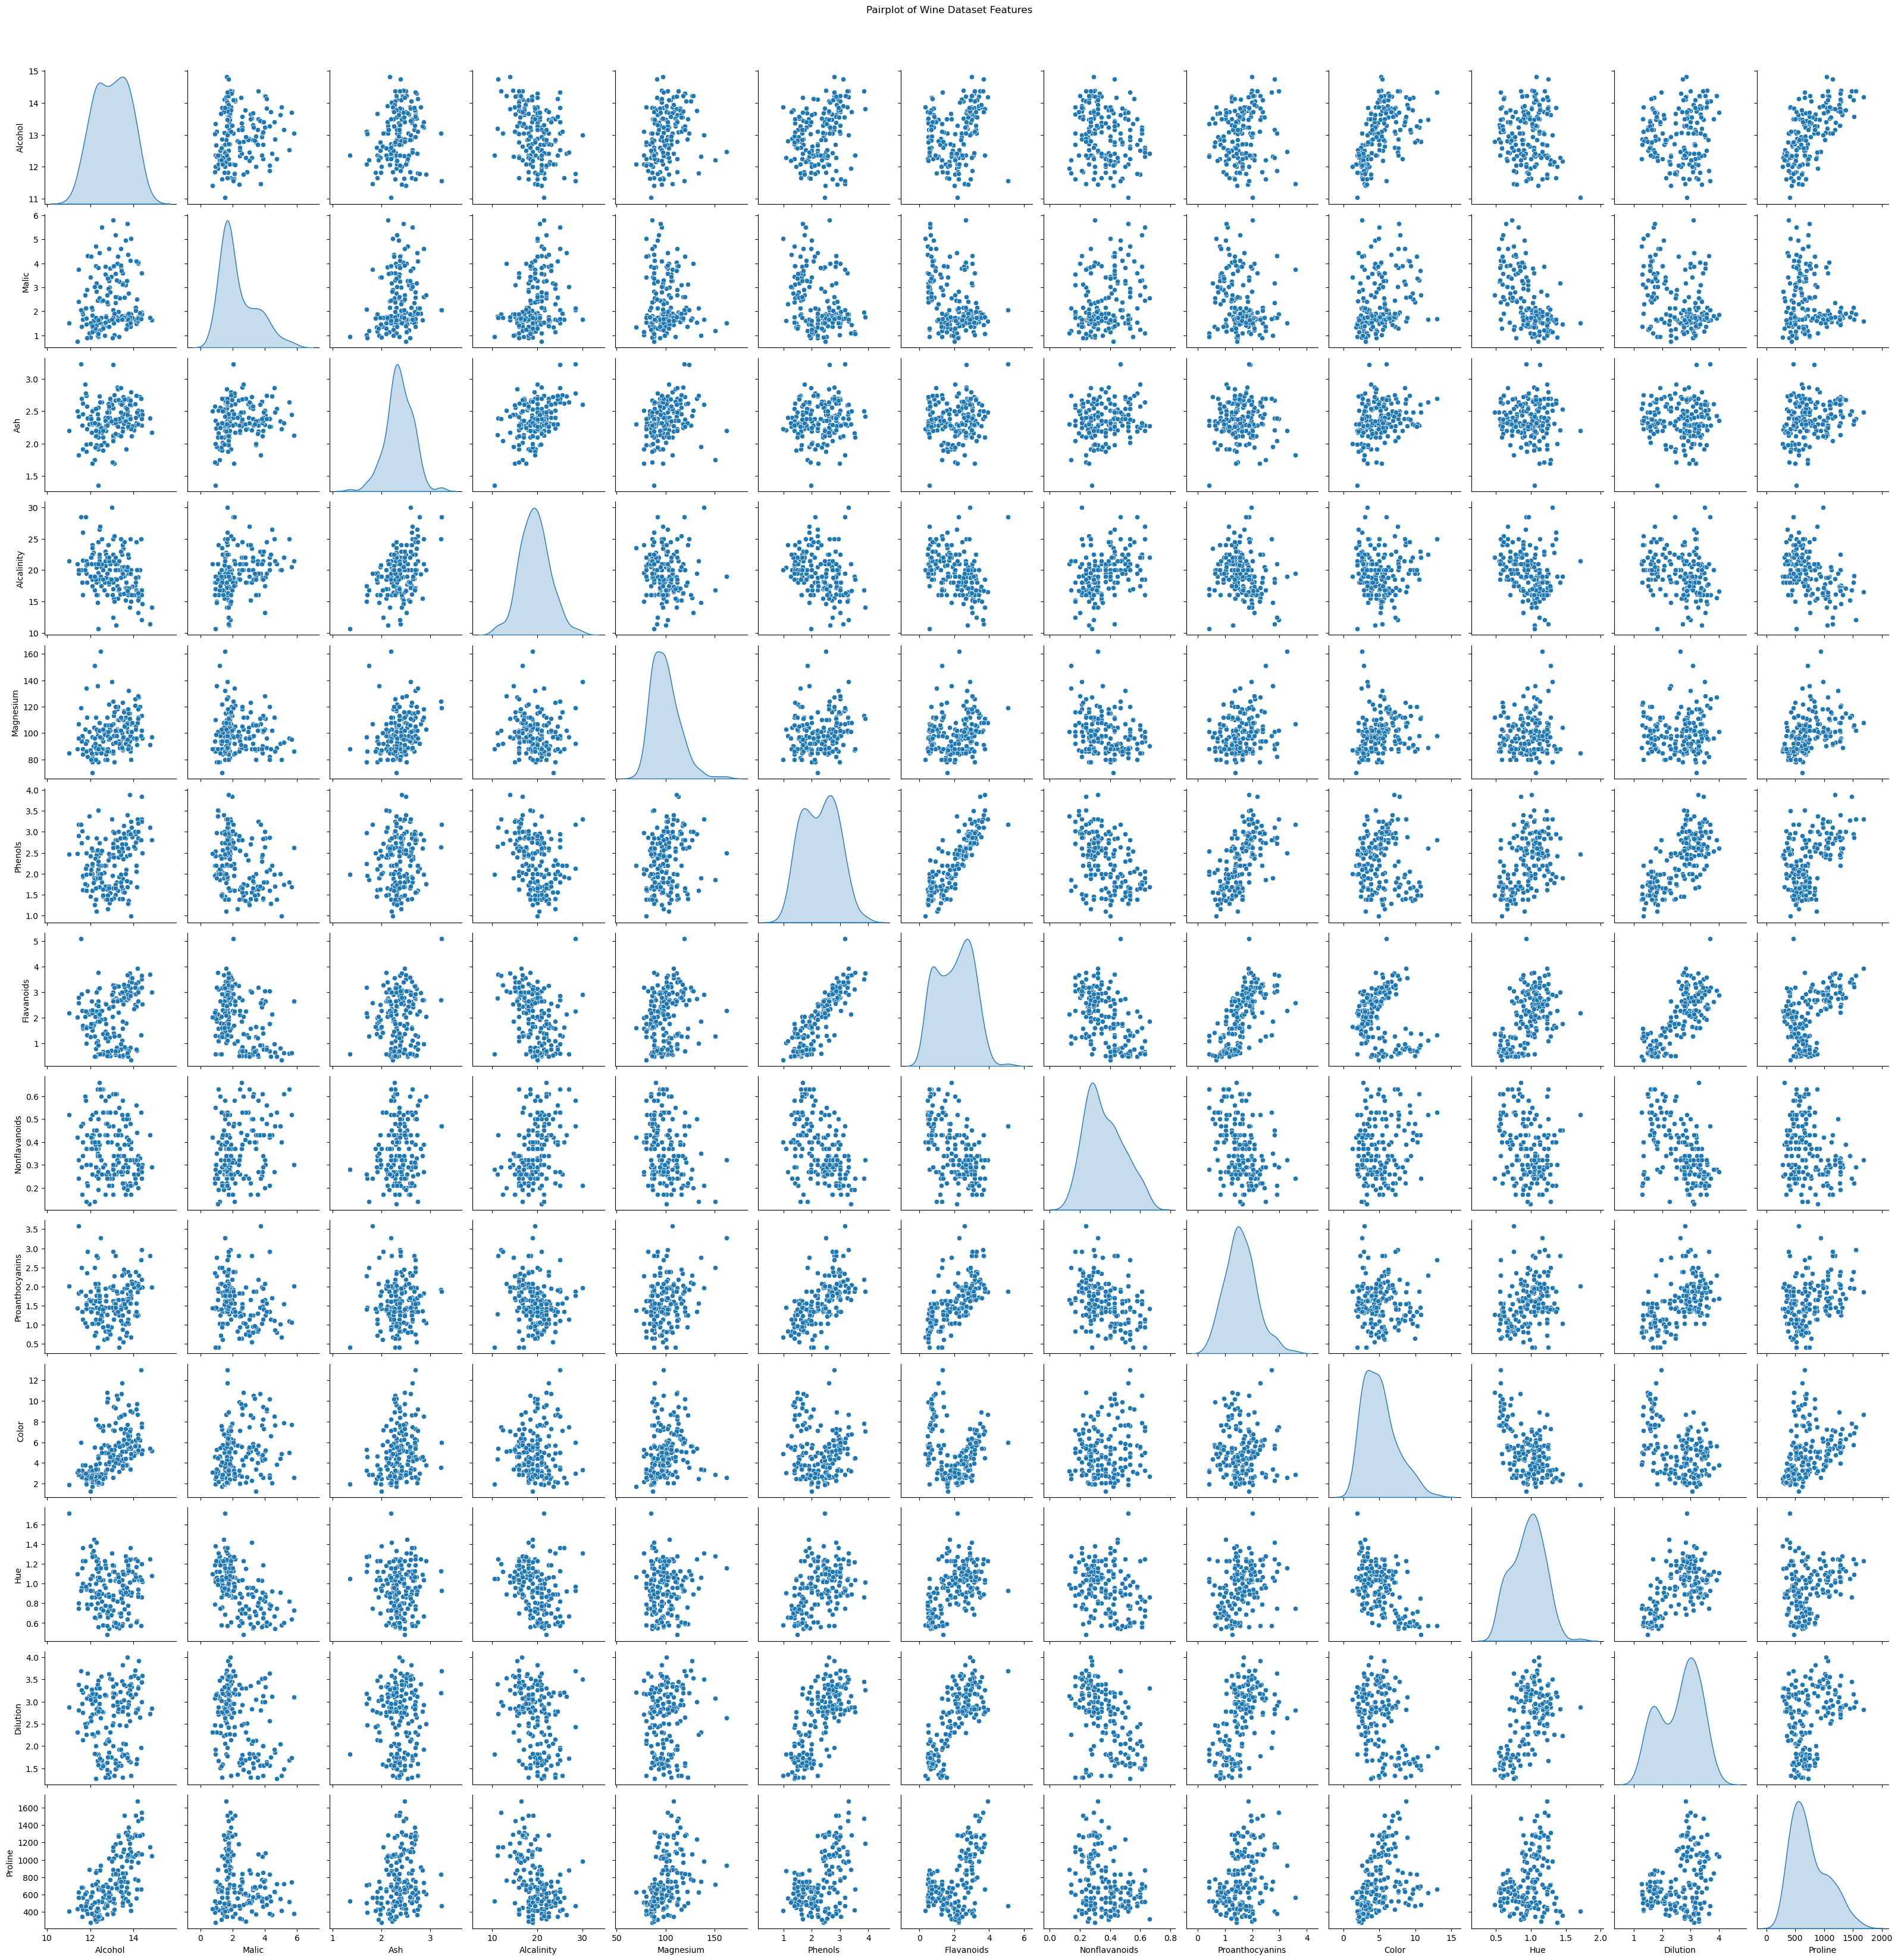

In [13]:
# Importing warnings library
import warnings

# Suppress any warnings that might clutter the output
warnings.filterwarnings("ignore")

# Create a pairplot for the wine dataset
# - 'diag_kind='kde'' sets the diagonal plots to be Kernel Density Estimates (KDEs) instead of histograms
# - 'sns.pairplot()' generates pairwise relationships for all features in the dataset
sns.pairplot(wine, diag_kind='kde')

# - 'plt.suptitle' adds a title to the entire figure, with 'y=1.02' adjusting the title's vertical position
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)

# - 'plt.show()' displays the plot
plt.show()

### 3. Investigate correlations between features to understand relationships within the data

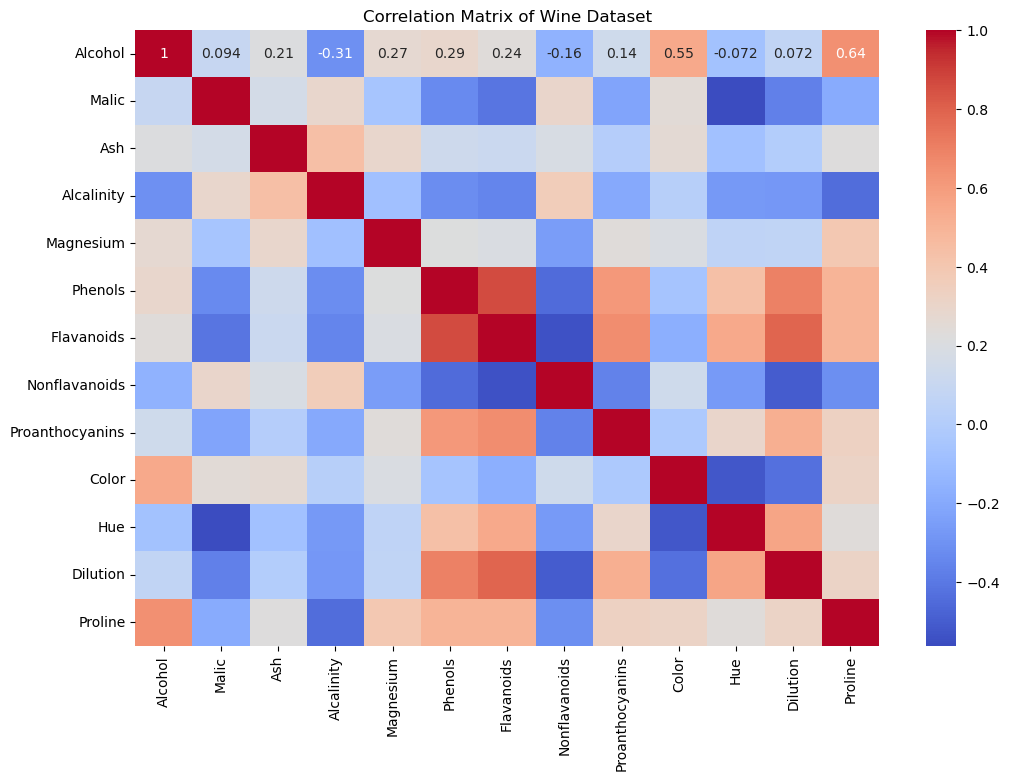

In [14]:
# Set the figure size to 12x8 inches for better readability of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix of the wine dataset
# - 'wine_df.corr()' computes the correlation matrix of the features
# - 'annot=True' displays the correlation coefficients on the heatmap
# - 'cmap='coolwarm'' sets the color map to highlight positive and negative correlations

sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

# Add a title to the heatmap for context
plt.title('Correlation Matrix of Wine Dataset')

# Display the heatmap
plt.show()


### Task 2: Dimensionality Reduction with PCA

#### 1. Standardize the features to ensure they have a mean of 0 and a standard deviation of 1

In [18]:
# Initialize the StandardScaler object
# - This scaler will standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the StandardScaler to the wine dataset and transform it
# - 'fit_transform()' first computes the mean and standard deviation for scaling and then applies the transformation
# - The result, 'scaled_data', is the standardized version of the wine dataset
scaled_data = scaler.fit_transform(wine)

In [19]:
# Displaying the scaled data
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### 2. Implement PCA to reduce the dimensionality of the dataset

In [20]:
# Initialize the PCA object
# - This will create a PCA instance that can be used to perform dimensionality reduction
pca = PCA()

# Fit the PCA model to the scaled data and apply the dimensionality reduction
# - 'fit_transform()' computes the principal components and then projects the data onto these components
# - The result, 'pca_data', is the transformed dataset in the new principal component space
pca_data = pca.fit_transform(scaled_data)

In [21]:
# Displaying the reduced dimensions
pca_data

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

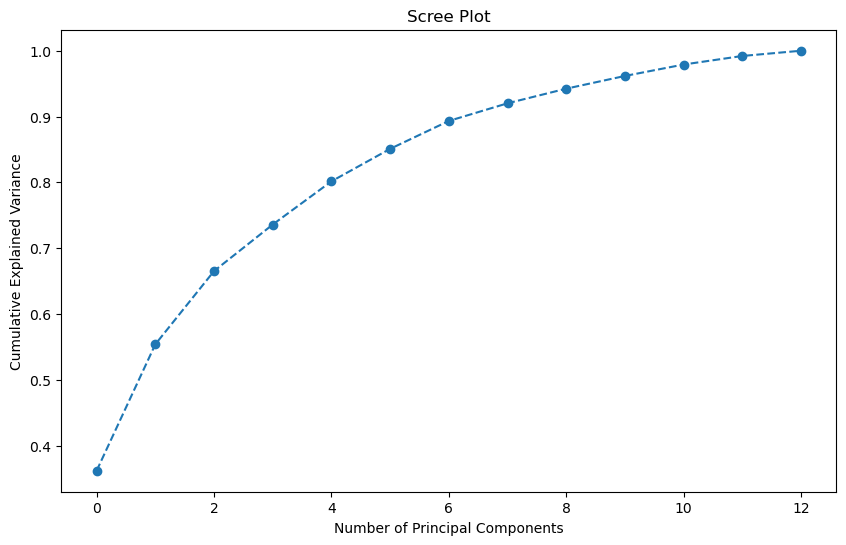

In [22]:
# Determine the optimal number of principal components using scree plot or cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

#### 3. Transform the original dataset into the principal components

In [23]:
# Choose 2 components for visualization

# Initialize the PCA object with the number of components set to 2
# - 'n_components=2' specifies that we want to reduce the data to 2 principal components for easier visualization
optimal_pca = PCA(n_components=2)

# Fit the PCA model to the scaled data and transform it to 2 components
# - 'fit_transform()' computes the principal components and reduces the data to 2 dimensions
# - The result, 'pca_transformed_data', is the dataset transformed into 2 principal components for visualization
pca_transformed_data = optimal_pca.fit_transform(scaled_data)

In [24]:
# Disaplying the pca-transformed_data
pca_transformed_data

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

### Task 3: Clustering with Original Data

#### 1. Apply a clustering algorithm (e.g., K-means) to the original dataset

In [25]:
# Initialize the KMeans object with 3 clusters
# - 'n_clusters=3' specifies that we want to partition the data into 3 clusters
# - 'random_state=42' ensures reproducibility of the results by setting a seed for random number generation
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the scaled data and predict the cluster labels
# - 'fit_predict()' first fits the model to the data and then assigns each data point to a cluster
# - The result, 'original_clusters', contains the cluster labels for each data point in the original scaled dataset
original_clusters = kmeans.fit_predict(scaled_data)

#### 2. Visualize the clustering results using appropriate plots

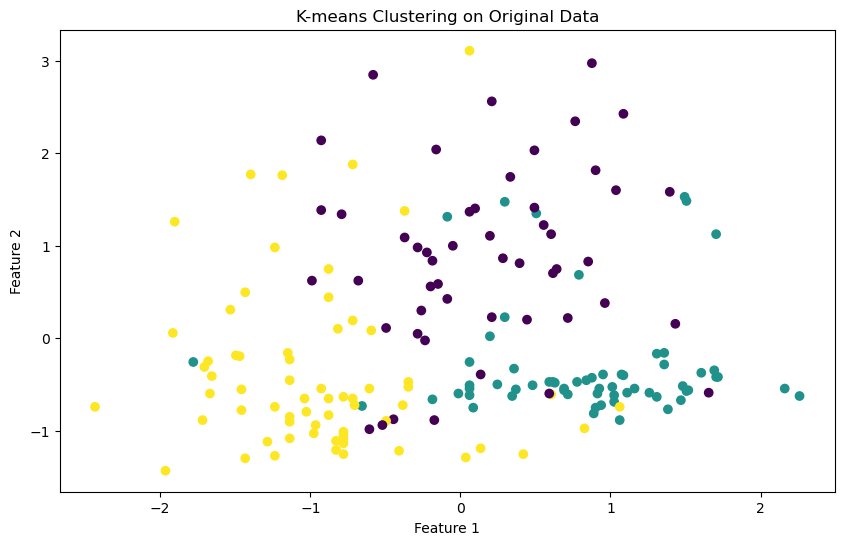

In [26]:
# Create a figure with a size of 10x6 inches for better visibility
plt.figure(figsize=(10, 6))

# Plot a scatter plot of the scaled data with K-means clustering results
# - 'scaled_data[:, 0]' and 'scaled_data[:, 1]' are the coordinates for the scatter plot (first and second features)
# - 'c=original_clusters' colors the data points according to their cluster labels
# - 'cmap='viridis'' specifies the color map to use for different clusters
# - 'marker='o'' sets the marker style to circles
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=original_clusters, cmap='viridis', marker='o')

# Add a title to the plot
plt.title('K-means Clustering on Original Data')

# Label the x-axis
plt.xlabel('Feature 1')

# Label the y-axis
plt.ylabel('Feature 2')

# Display the plot
plt.show()


#### 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index

In [27]:
# Calculate the silhouette score for the clustering results
# - 'scaled_data' is the dataset used for clustering
# - 'original_clusters' contains the cluster labels assigned by the KMeans model
# - The silhouette score evaluates how similar each data point is to points in its own cluster compared to points in other clusters
silhouette_orig = silhouette_score(scaled_data, original_clusters)

# Print the silhouette score for the original data
# - The score is formatted to 2 decimal places for readability
print(f'Silhouette Score (Original Data): {silhouette_orig:.2f}')


Silhouette Score (Original Data): 0.28


### Task 4: Clustering with PCA Data

#### 1. Apply the same clustering algorithm to the PCA-transformed dataset

In [28]:
# Fit the KMeans model to the PCA-transformed data and predict cluster labels
# - 'pca_transformed_data' is the dataset reduced to 2 principal components
# - 'fit_predict()' applies the KMeans clustering algorithm to this PCA-reduced data
# - The result, 'pca_clusters', contains the cluster labels for each data point in the PCA-transformed dataset
pca_clusters = kmeans.fit_predict(pca_transformed_data)

In [29]:
# Displaying the pca_clusters
pca_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### 2. Visualize the clustering results obtained from PCA-transformed data

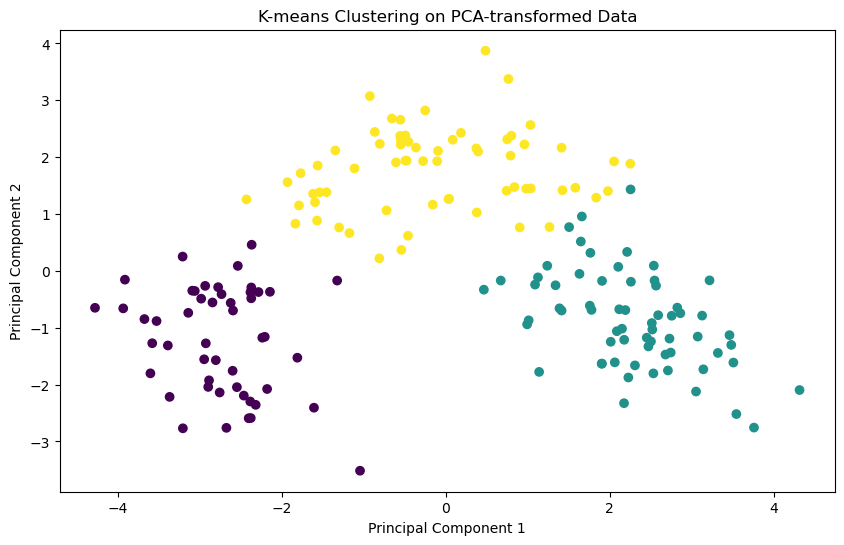

In [30]:
# Create a figure with a size of 10x6 inches for better visibility
plt.figure(figsize=(10, 6))

# Plot a scatter plot of the PCA-transformed data with K-means clustering results
# - 'pca_transformed_data[:, 0]' and 'pca_transformed_data[:, 1]' are the coordinates for the scatter plot (principal components)
# - 'c=pca_clusters' colors the data points according to their cluster labels from the KMeans model
# - 'cmap='viridis'' specifies the color map to use for different clusters
# - 'marker='o'' sets the marker style to circles
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=pca_clusters, cmap='viridis', marker='o')

# Add a title to the plot
plt.title('K-means Clustering on PCA-transformed Data')

# Label the x-axis with Principal Component 1
plt.xlabel('Principal Component 1')

# Label the y-axis with Principal Component 2
plt.ylabel('Principal Component 2')

# Display the plot
plt.show()


#### 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index

In [31]:
# Calculate the silhouette score for the clustering results on PCA-transformed data
# - 'pca_transformed_data' is the dataset reduced to 2 principal components
# - 'pca_clusters' contains the cluster labels assigned by the KMeans model on PCA data
# - The silhouette score measures how similar each data point is to points in its own cluster compared to points in other clusters
silhouette_pca = silhouette_score(pca_transformed_data, pca_clusters)

# Print the silhouette score for the PCA-transformed data
# - The score is formatted to 2 decimal places for readability
print(f'Silhouette Score (PCA Data): {silhouette_pca:.2f}')

Silhouette Score (PCA Data): 0.56


### Task 5: Comparison and Analysis

#### 1. Compare the clustering results obtained from the original dataset and PCA-transformed data

In [32]:
print(f'Comparison of Silhouette Scores:\nOriginal Data: {silhouette_orig:.2f}\nPCA Data: {silhouette_pca:.2f}')

Comparison of Silhouette Scores:
Original Data: 0.28
PCA Data: 0.56


#### 2.	Discuss any similarities or differences observed in the clustering results.

##### Same number of clusters: Both images have the same number of groups.
##### Similar distribution: The points in each group are spread out similarly.
##### But there are also differences:

##### Shape of clusters: The shapes of the groups are slightly different.
##### Separation: The distance between groups might be different.

#### 3.	Reflect on the impact of dimensionality reduction on clustering performance
##### Dimensionality reduction can help:

##### Make calculations faster: It can be easier to work with fewer numbers.
##### Improve results: Sometimes, removing unnecessary information can help the clustering work better.

#### But it can also hurt:

##### Lose information: Important details might get lost when you simplify the data.
##### Change the shape of groups: The groups might look different after reducing dimensions.

#### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
##### 3. Trade-offs Between PCA and Direct Clustering
##### Using PCA (Principal Component Analysis) can:

##### Simplify the data: It makes the data easier to understand.
##### Save time: Calculations can be faster.
##### But it might:

##### Lose important details: Some information might be lost.
##### Change the shape of groups: The groups might look different.
##### Clustering directly on the original data:

##### Keeps all information: Nothing is lost.
##### Can be slower: Calculations might take longer.

### Task 6: Conclusion and Insights

#### 1.	Summarize the key findings and insights from the assignment.

##### Clustering performance: While dimensionality reduction using PCA did not significantly alter the overall number of clusters or their general distribution, it did affect the shape and separation of the clusters.

##### Impact of dimensionality reduction: PCA can be beneficial in reducing computational costs and improving clustering performance, especially in high-dimensional datasets with redundant features. However, it can also lead to a loss of information and distorted cluster structures.

##### Trade-offs between PCA and direct clustering: The choice between PCA and direct clustering depends on the specific characteristics of the dataset, the clustering algorithm used, and the goals of the analysis. PCA is generally suitable for datasets with high dimensionality and redundant features, while direct clustering may be preferable for datasets with complex nonlinear relationships or when preserving all information is crucial.

#### 2. Practical Implications

##### Data preprocessing: PCA can be a valuable tool for preprocessing high-dimensional data before applying clustering algorithms. By reducing the dimensionality, it can improve computational efficiency and potentially enhance clustering accuracy.

##### Feature engineering: PCA can be used to create new features that are linear combinations of the original features, which can provide insights into the underlying structure of the data.

##### Visualization: PCA can be used to visualize high-dimensional data in a lower-dimensional space, making it easier to understand and interpret clustering results.   

##### Computational efficiency: For large datasets, PCA can significantly reduce computational costs, making clustering algorithms more feasible.

#### 3. Recommendations
##### Use PCA when:
###### The dataset is high-dimensional and contains redundant features.
Computational efficiency is a concern.
Visualization is desired.
Feature engineering is needed.
##### Use direct clustering when:
Preserving all information is crucial.
The dataset has complex nonlinear relationships.
The clustering algorithm is designed to handle high-dimensional data without dimensionality reduction.